# A Double Pendulum

## Derivation of Motion Equations

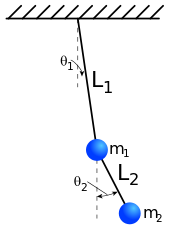

As we have applied $F = ma$ in simple pendulum case, it is not entirely valid for this case. Newton's second law is valid for $m_1$ alone as $\theta_1$ and therefore anglular acceleration ($\ddot{\theta_1}$) are w.r.t inertial frame i.e. fixed pivot point. However, the same cannot be said for mass $m_2$ where the anlge $\theta_2$ and acceleration ($\ddot{\theta_2}$) are w.r.t non-inertial frame of mass $m_1$.

## Equations of Motion

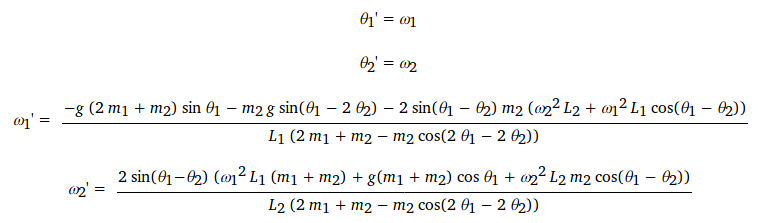

In [9]:
%matplotlib inline

import math
import numpy as np
from scipy.integrate import odeint

from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [10]:
def deg2rad(theta):
    return theta*math.pi/180

In [11]:
g = 9.81 # m/s**2

l1 = 1 # m
m1 = 1 # kg
l2 = 1 # m
m2 = 1 # kg

theta1_o = 90 # degrees
theta1_dot_o = 0 # rad/s
theta2_o = 90 # degrees
theta2_dot_o = 0 # rad/s

## co-ordinates for plot
C = (0, 0)

x1 = l1*math.sin(deg2rad(theta1_o))
y1 = -l1*math.cos(deg2rad(theta1_o))

x2 = x1 + l2*math.sin(deg2rad(theta2_o))
y2 = y1 - l2*math.cos(deg2rad(theta2_o))

In [12]:
def dU_dt(U, t):
    # U[0] = theta1, U[1] = theta2, U[2] = omega1, U[3] = omega2
    I1 = U[2]
    I2 = U[3]
    I3_N = -g*(2*m1 + m2)*math.sin(U[0]) - m2*g*math.sin(U[0] - 2*U[1]) - 2*math.sin(U[0] - U[1])*m2*(U[3]**2*l2 + U[2]**2*l1*math.cos(U[0] - U[1])) 
    I3_D = l1*(2*m1 + m2 - m2*math.cos(2*U[0] - 2*U[1]))
    I3 = I3_N/I3_D
    I4_N = 2*math.sin(U[0] - U[1])*(U[2]**2*l1*(m1 + m2) + g*(m1 + m2)*math.cos(U[0]) + U[3]**2*l2*m2*math.cos(U[0] - U[1]))
    I4_D = l2*(2*m1 + m2 - m2*math.cos(2*U[0] - 2*U[1]))
    I4 = I4_N/I4_D
    return [I1, I2, I3, I4]

U0 = [deg2rad(theta1_o), deg2rad(theta2_o), theta1_dot_o, theta2_dot_o]

t = np.linspace(0, 50, 1000)
sys_var = odeint(dU_dt, U0, t)
theta1_s = sys_var[:,0]
theta2_s = sys_var[:,1]

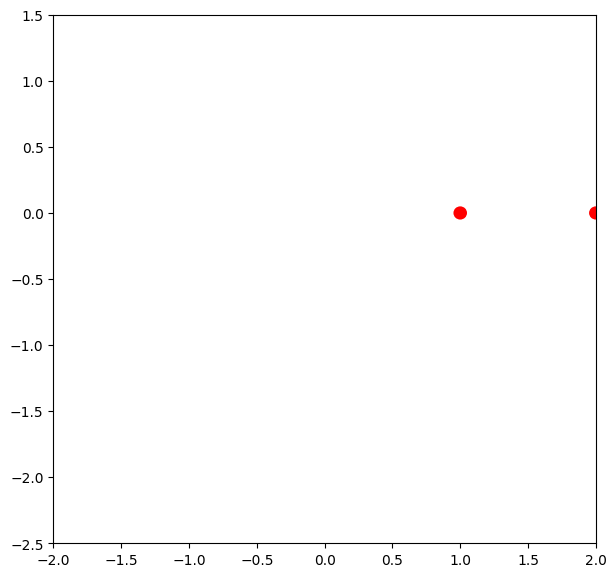

In [13]:
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 7)

ax = plt.axes(xlim=(-2, 2), ylim=(-2.5, 1.5))
patch1 = plt.Circle((x1, y1), 0.05, fc='r')
patch2 = plt.Circle((x2, y2), 0.05, fc='r')

line1, = ax.plot([], [], 'b')
line2, = ax.plot([], [], 'b')
curve, = ax.plot([], [], 'k')

curve_x = []
curve_y = []



def curve_cord(x, y):
    curve_x.append(x)
    curve_y.append(y)
    #print(len(curve_x))
    return curve_x, curve_y

def init():
    patch1.center = (x1, y1)
    ax.add_patch(patch1)
    patch2.center = (x2, y2)
    ax.add_patch(patch2)
    line1.set_data([], [])
    line2.set_data([], [])
    curve.set_data([], [])
    return patch1, patch2, line1, line2, curve,


def animate(t):
    theta1 = theta1_s[t]
    theta2 = theta2_s[t]
    #print(theta1, theta2)
    x1 = l1*math.sin(theta1)
    y1 = -l1*math.cos(theta1)
    x2 = x1 + l2*math.sin(theta2)
    y2 = y1 - l2*math.cos(theta2)
    patch1.center = (x1, y1)
    patch2.center = (x2, y2)
    
    line1.set_data([0, x1], [0, y1])
    line2.set_data([x1, x2], [y1, y2])
    curve.set_data(*curve_cord(x2, y2))
    return patch1, patch2, line1, line2, curve,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init,
                               frames=1000,
                               interval=200,
                               blit=True)

In [14]:
HTML(anim.to_html5_video())

In [ ]:
#anim.save('double_pendulum.mp4')
